### Link: https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [3]:
# Drop 'Subject ID', 'MRID ID', 'MR Delay' - recording purposes ONLY or no influence in end results
df = df.drop(['Subject ID', 'MRI ID', 'MR Delay'], axis=1)

In [4]:
# Drop 'Hand' - according to summary all subjects are right-handed
df['Hand'].value_counts()

Hand
R    373
Name: count, dtype: int64

In [5]:
df = df.drop('Hand', axis=1)

In [6]:
# Drop 'Visit' - for the purposes of the analysis I am about to perform, I am not interested in the number of visits since column
# data is already weighted
df = df.drop('Visit', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [8]:
# Convert the only Categorical Feature 'M/F' to 'Is_Male' --> 1 for 'Yes' & 0 for 'No'
df['M/F'].value_counts()

M/F
F    213
M    160
Name: count, dtype: int64

In [9]:
df['M/F'] = df['M/F'].replace({'M': '1', 'F': '0'})
df['M/F'].value_counts()

M/F
0    213
1    160
Name: count, dtype: int64

In [10]:
df.rename(columns={'M/F': 'Is_Male'}, inplace=True)

In [11]:
# Let's now deal with the NULL values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Group    373 non-null    object 
 1   Is_Male  373 non-null    object 
 2   Age      373 non-null    int64  
 3   EDUC     373 non-null    int64  
 4   SES      354 non-null    float64
 5   MMSE     371 non-null    float64
 6   CDR      373 non-null    float64
 7   eTIV     373 non-null    int64  
 8   nWBV     373 non-null    float64
 9   ASF      373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [12]:
# SES & MMSE

# In order to decide whether to simply drop rows will NULL data, let's see how many rows are being affected

null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

len(null_rows)

19

In [13]:
# Percent Error

Error = 100 - ((1 - 19/373) * 100)
Error

5.093833780160864

In [14]:
# I am willing to drop approximately %5 of the entries to prevent any estimations being done
rows_to_drop = list(null_rows.index)
# Drop rows based on index location
df.drop(rows_to_drop, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 372
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Group    354 non-null    object 
 1   Is_Male  354 non-null    object 
 2   Age      354 non-null    int64  
 3   EDUC     354 non-null    int64  
 4   SES      354 non-null    float64
 5   MMSE     354 non-null    float64
 6   CDR      354 non-null    float64
 7   eTIV     354 non-null    int64  
 8   nWBV     354 non-null    float64
 9   ASF      354 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 30.4+ KB


In [16]:
# Some subjects treated as demented or Nondemented at initial visit later transformed into the opposite diagnosis managed by converted type. Thus, 
# every row with 'converted' will have to be dropped since final diagnosis is not specified
df['Group'].value_counts()

Group
Nondemented    190
Demented       127
Converted       37
Name: count, dtype: int64

In [21]:
remove = list(df[df['Group'] == 'Converted'].index)
df.drop(remove, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 372
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Group    317 non-null    object 
 1   Is_Male  317 non-null    object 
 2   Age      317 non-null    int64  
 3   EDUC     317 non-null    int64  
 4   SES      317 non-null    float64
 5   MMSE     317 non-null    float64
 6   CDR      317 non-null    float64
 7   eTIV     317 non-null    int64  
 8   nWBV     317 non-null    float64
 9   ASF      317 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 27.2+ KB


<Axes: >

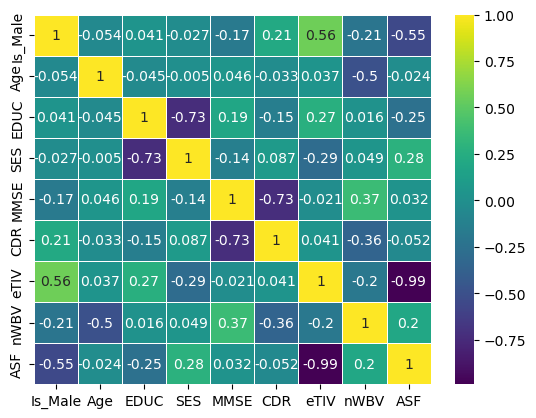

In [35]:
X = df.drop('Group', axis=1)
y = df['Group']

sns.heatmap(X.corr(), annot=True, linewidths=0.5, cmap='viridis')

<Axes: xlabel='Group', ylabel='count'>

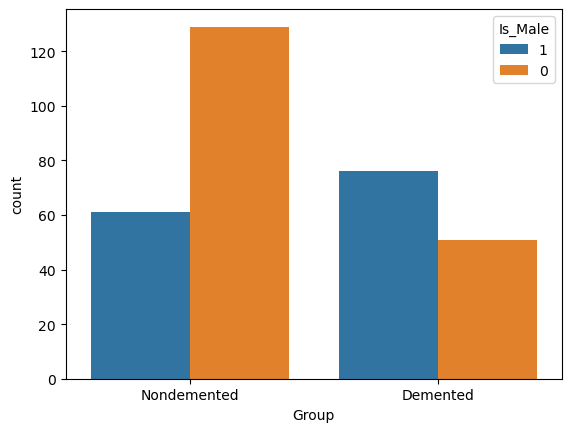

In [39]:
sns.countplot(data=df, x='Group', hue='Is_Male')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Demented Distribution Across All Ages')

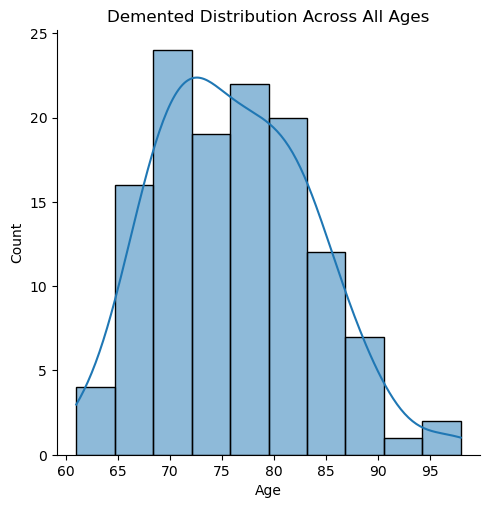

In [52]:
demented = df[df['Group'] == 'Demented']
sns.displot(data=demented, x='Age', bins=10, kde=True)
plt.title('Demented Distribution Across All Ages')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'NonDemented Distribution Across All Ages')

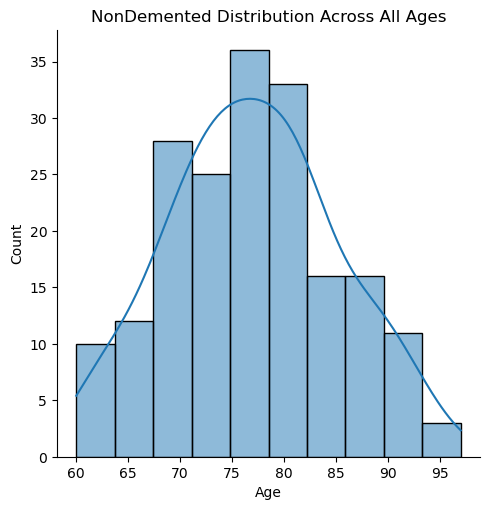

In [50]:
nondemented = df[df['Group'] == 'Nondemented']
sns.displot(data=nondemented, x='Age', bins=10, kde=True)
plt.title('NonDemented Distribution Across All Ages')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],           
    'kernel': ['linear', 'rbf'],       
    'gamma': ['scale', 'auto'],        
    'degree': [2, 3, 4],               
}

svc = SVC()

# GridSearchCV -- equivalent to model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [60]:
print(grid_search.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [73]:
# Final Model
from sklearn.metrics import confusion_matrix, classification_report

model = SVC(C=1, degree=2, gamma='scale', kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1, degree=2, kernel='linear')

In [74]:
prediction = model.predict(X_test_scaled)
confusion_matrix(y_test, prediction)

array([[39,  0],
       [ 2, 55]], dtype=int64)

In [79]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Demented       0.95      1.00      0.97        39
 Nondemented       1.00      0.96      0.98        57

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



In [81]:
from joblib import dump, load
dump(model, 'dementia_model.joblib') 

['dementia_model.joblib']